# Exploratory data analysis

In [2]:
%matplotlib inline
import pandas as pd
import os
import matplotlib.pyplot as plt
import sqlite3

The .csv output files are uploaded from my local computer. They are one of the outputs from go_battery.bat and go_process.bat.

In [24]:
path = os.getcwd()
battery_key = pd.read_csv(path + "\\battery_use_output_key-000000.csv")
battery_timing = pd.read_csv(path + "\\battery_use_output_timing-000000.csv")
process_key = pd.read_csv(path + "\\processes_output_key-000000.csv")
process_timing = pd.read_csv(path + "\\processes_output_timing-000000.csv")

In [39]:
conversion_b = dict(zip(battery_key.input, battery_key.counter))
conversion_p = dict(zip(process_key.input, process_key.counter))

In [82]:
battery = battery_timing.rename(columns = conversion_b).reset_index()
battery.head()

,index,Out-of-cycle (flag),Sample Count (samples),Clock Drift (flag),Clock Drift Ratio (no unit),Elapsed Time Since ESRV Start (ms),Wall Time (ms),Input(s) Time (ms),PL Time (ms),PL Agent Time (ms),...,Correlation Time (ms),LOG Time (ms),Equation Selection Time (ms),Equation(s) Computation Time (ms),CLK Time (ms),FSM Time (ms),ANN Time (ms),DYNLIB Time (ms),DLIBXLD Last Time (ms),Input Library [ACPI-BATTERY] Time (ms)
0,0,0,0,0.0,0.0000,0.0244,0.0189,0.0,0.0,0.0,...,0.0000,0.0,0.0,0.0,0.0,0.0,0.0002,0.0,0.000,NaN
1,0,1,0,0.0,1.6692,0.0504,0.0426,0.0,0.0,0.0,...,2.2601,0.0,0.0,0.0,0.0,0.0,0.0001,0.0,0.000,NaN
2,0,2,0,0.0,999.0829,0.3572,0.3450,0.0,0.0,0.0,...,0.0240,0.0,0.0,0.0,0.0,0.0,0.0001,0.0,0.281,NaN
3,0,3,0,0.0,1999.9355,0.0445,0.0370,0.0,0.0,0.0,...,0.0231,0.0,0.0,0.0,0.0,0.0,0.0001,0.0,0.000,NaN
4,0,4,0,0.0,3000.0779,0.0447,0.0367,0.0,0.0,0.0,...,0.1552,0.0,0.0,0.0,0.0,0.0,0.0001,0.0,0.000,NaN


In [85]:
battery.shape

(107, 24)

In [83]:
battery.describe()

,Out-of-cycle (flag),Sample Count (samples),Clock Drift (flag),Clock Drift Ratio (no unit),Elapsed Time Since ESRV Start (ms),Wall Time (ms),Input(s) Time (ms),PL Time (ms),PL Agent Time (ms),OS Time (ms),...,Correlation Time (ms),LOG Time (ms),Equation Selection Time (ms),Equation(s) Computation Time (ms),CLK Time (ms),FSM Time (ms),ANN Time (ms),DYNLIB Time (ms),DLIBXLD Last Time (ms),Input Library [ACPI-BATTERY] Time (ms)
count,107.000000,107.0,107.000000,107.000000,107.000000,107.000000,107.0,107.0,107.0,107.0,...,107.000000,107.0,107.0,107.000000,107.0,107.0,107.000000,107.0,107.000000,0.0
mean,53.000000,0.0,0.906577,52074.681080,0.647910,0.639079,0.0,0.0,0.0,0.0,...,0.134074,0.0,0.0,0.006215,0.0,0.0,0.000093,0.0,0.280024,NaN
std,31.032241,0.0,0.292455,31051.778113,1.670512,1.670152,0.0,0.0,0.0,0.0,...,0.226981,0.0,0.0,0.002064,0.0,0.0,0.000040,0.0,0.458866,NaN
min,0.000000,0.0,0.000000,0.000000,0.024400,0.018900,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,NaN
25%,26.500000,0.0,0.999500,25534.223350,0.049400,0.041600,0.0,0.0,0.0,0.0,...,0.022750,0.0,0.0,0.006500,0.0,0.0,0.000100,0.0,0.000000,NaN
50%,53.000000,0.0,1.000100,52065.604100,0.133700,0.125800,0.0,0.0,0.0,0.0,...,0.143400,0.0,0.0,0.007000,0.0,0.0,0.000100,0.0,0.000000,NaN
75%,79.500000,0.0,1.000204,78590.993400,1.074300,1.065050,0.0,0.0,0.0,0.0,...,0.159800,0.0,0.0,0.007200,0.0,0.0,0.000100,0.0,0.353250,NaN
max,106.000000,0.0,1.001052,105126.066500,13.700500,13.693000,0.0,0.0,0.0,0.0,...,2.260100,0.0,0.0,0.007300,0.0,0.0,0.000200,0.0,1.263000,NaN


In [78]:
process = process_timing.rename(columns = conversion_p).reset_index()
process.describe()

,index,Out-of-cycle (flag),Sample Count (samples),Clock Drift (flag),Clock Drift Ratio (no unit),Elapsed Time Since ESRV Start (ms),Wall Time (ms),Input(s) Time (ms),PL Time (ms),PL Agent Time (ms),...,Correlation Time (ms),LOG Time (ms),Equation Selection Time (ms),Equation(s) Computation Time (ms),CLK Time (ms),FSM Time (ms),ANN Time (ms),DYNLIB Time (ms),DLIBXLD Last Time (ms),Input Library [PROCESS] Time (ms)
count,103.0,103.000000,103.0,103.000000,103.000000,103.000000,103.000000,103.0,103.0,103.0,...,103.000000,103.0,103.0,103.000000,103.0,103.0,103.000000,103.0,103.0,0.0
mean,0.0,51.000000,0.0,0.902911,50116.295492,0.116510,0.104932,0.0,0.0,0.0,...,0.020748,0.0,0.0,0.015421,0.0,0.0,0.000093,0.0,0.0,NaN
std,0.0,29.877528,0.0,0.297524,29926.311188,0.385943,0.386008,0.0,0.0,0.0,...,0.003305,0.0,0.0,0.028373,0.0,0.0,0.000068,0.0,0.0,NaN
min,0.0,0.000000,0.0,0.000000,0.000000,0.030500,0.021300,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,NaN
25%,0.0,25.500000,0.0,0.999800,24545.262050,0.037650,0.026850,0.0,0.0,0.0,...,0.020300,0.0,0.0,0.006800,0.0,0.0,0.000100,0.0,0.0,NaN
50%,0.0,51.000000,0.0,0.999959,50105.366500,0.043900,0.031700,0.0,0.0,0.0,...,0.020800,0.0,0.0,0.006900,0.0,0.0,0.000100,0.0,0.0,NaN
75%,0.0,76.500000,0.0,1.000100,75661.461400,0.070450,0.056350,0.0,0.0,0.0,...,0.021400,0.0,0.0,0.007100,0.0,0.0,0.000100,0.0,0.0,NaN
max,0.0,102.000000,0.0,1.000536,101243.125200,3.684900,3.674000,0.0,0.0,0.0,...,0.045000,0.0,0.0,0.101300,0.0,0.0,0.000600,0.0,0.0,NaN


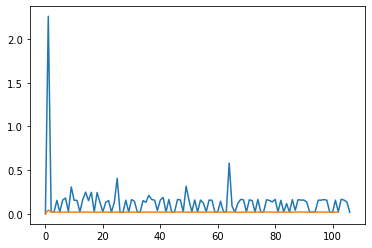

In [88]:
#plot the correlation time to see the difference
plt.plot(battery['Correlation Time (ms)'], label = "battery")
plt.plot(process['Correlation Time (ms)'], label = 'process')

Now we are going to do some data exploratory analysis on the merged database. The merged database is the output from running the SDKMain.exe (ATLSDK).

In [3]:
mycwd = os.getcwd()
os.chdir("..") #go to the previous dir
os.getcwd()

'C:\\Users\\Yingyin\\Documents\\GitHub\\Capstone-Project'

In [4]:
outputPath = os.getcwd() + "\\src\\data\\Project\\working_directory\\output"
DBName = "IDC_DATABASE.SQLITE"

In [5]:
conn = sqlite3.connect(outputPath+"\\"+DBName)
c = conn.cursor()

Let's explore what data we have from the merged database.

In [6]:
c.execute("CREATE TABLE tbl1 AS  \
                    SELECT * FROM inputs b \
                    INNER JOIN input_libraries a \
                    WHERE (a.session_ID = b.session_ID) AND (a.id_input_library = b.id_input_library)")

In [7]:
# c.execute("DROP TABLE tbl1")

In [8]:
columns = {}
for x in (c.execute("PRAGMA table_info(tbl1)")):
    columns[x[1]] = x[2]
columns

{'ID_INPUT': 'INT',
 'ID_INPUT_LIBRARY': 'INT',
 'ID_BLOB_INPUT': 'INT',
 'INDEX_IN_BLOB': 'INT',
 'INPUT_NAME': 'TEXT',
 'INPUT_DESCRIPTION': 'TEXT',
 'INPUT_TYPE': 'INT',
 'INPUT_CATALOG_TIME_UTC': 'NUM',
 'GUID': 'TEXT',
 'SESSION_ID': 'INT',
 'ID_INPUT_LIBRARY:1': 'INT',
 'NAME': 'TEXT',
 'FILE_NAME': 'TEXT',
 'VERSION': 'TEXT',
 'GUID:1': 'TEXT',
 'LOAD_TIME_UTC': 'NUM',
 'UNLOAD_TIME_UTC': 'NUM',
 'DYNAMIC': 'INT',
 'SESSION_ID:1': 'INT'}

In [9]:
df = pd.DataFrame(columns = columns.keys())

In [10]:
counter = 0
for x in c.execute("SELECT * FROM tbl1"):
    df.loc[counter] = x
    counter += 1

In [11]:
df.head()

,ID_INPUT,ID_INPUT_LIBRARY,ID_BLOB_INPUT,INDEX_IN_BLOB,INPUT_NAME,INPUT_DESCRIPTION,INPUT_TYPE,INPUT_CATALOG_TIME_UTC,GUID,SESSION_ID,ID_INPUT_LIBRARY:1,NAME,FILE_NAME,VERSION,GUID:1,LOAD_TIME_UTC,UNLOAD_TIME_UTC,DYNAMIC,SESSION_ID:1
0,0,0,0,0,BATTERY(0),Battery:::AC/DC::,1,2020-11-20 06:25:12.002,547f73d8-d0fe-478c-b822-69d88ed1a2f9,1000,0,BATTERY,C:\Users\Yingyin\Documents\GitHub\Capstone-Pro...,1.1.0.327,500e2ee8-c38f-4306-9e4a-88608ec5fc5d,2020-11-20 06:25:11.000,0000-00-00 00:00:00.000,0,1000
1,1,0,0,0,BATTERY(1),Battery:::BatteryLifeTime:Sec:,1,2020-11-20 06:25:12.003,b92cc7d8-6c93-4fb6-858f-5bfbac1a3e75,1000,0,BATTERY,C:\Users\Yingyin\Documents\GitHub\Capstone-Pro...,1.1.0.327,500e2ee8-c38f-4306-9e4a-88608ec5fc5d,2020-11-20 06:25:11.000,0000-00-00 00:00:00.000,0,1000
2,2,0,0,0,BATTERY(2),Battery:::MaxBatteryLifeTime:Sec:,1,2020-11-20 06:25:12.003,e571a62b-f92d-4d17-ab8f-cf0dfa21e59c,1000,0,BATTERY,C:\Users\Yingyin\Documents\GitHub\Capstone-Pro...,1.1.0.327,500e2ee8-c38f-4306-9e4a-88608ec5fc5d,2020-11-20 06:25:11.000,0000-00-00 00:00:00.000,0,1000
3,0,0,0,0,PROCESS(0),OS::PROCESS:EXECNAME::,4,2020-11-20 06:26:57.901,ee7de8db-96fe-483b-8391-3ad4fffe5473,2,0,PROCESS,C:\Users\Yingyin\Documents\GitHub\Capstone-Pro...,1.1.0.327,fcef3fe0-c8ff-4f35-a7f0-5bbdc857e8ad,2020-11-20 06:26:15.000,0000-00-00 00:00:00.000,0,2
4,1,0,0,0,PROCESS(1),OS::PROCESS:KERNEL:SECS:,3,2020-11-20 06:26:57.901,d296755d-c52d-4302-b69c-03f097080c11,2,0,PROCESS,C:\Users\Yingyin\Documents\GitHub\Capstone-Pro...,1.1.0.327,fcef3fe0-c8ff-4f35-a7f0-5bbdc857e8ad,2020-11-20 06:26:15.000,0000-00-00 00:00:00.000,0,2


In [12]:
#drop repetitive columns
df = df.drop(columns = ['ID_INPUT_LIBRARY:1', 'SESSION_ID:1'], axis =1)

In [13]:
df.dtypes

ID_INPUT                  object
ID_INPUT_LIBRARY          object
ID_BLOB_INPUT             object
INDEX_IN_BLOB             object
INPUT_NAME                object
INPUT_DESCRIPTION         object
INPUT_TYPE                object
INPUT_CATALOG_TIME_UTC    object
GUID                      object
SESSION_ID                object
NAME                      object
FILE_NAME                 object
VERSION                   object
GUID:1                    object
LOAD_TIME_UTC             object
UNLOAD_TIME_UTC           object
DYNAMIC                   object
dtype: object

In [14]:
df.shape

(20, 17)

In [15]:
df.NAME.value_counts()

PROCESS    17
BATTERY     3
Name: NAME, dtype: int64

In [16]:
df.INPUT_DESCRIPTION

0                         Battery:::AC/DC::
1            Battery:::BatteryLifeTime:Sec:
2         Battery:::MaxBatteryLifeTime:Sec:
3                    OS::PROCESS:EXECNAME::
4                  OS::PROCESS:KERNEL:SECS:
5                    OS::PROCESS:USER:SECS:
6         OS:ETW:PROCESS:DISKIO_READ:BYTES:
7        OS:ETW:PROCESS:DISKIO_WRITE:BYTES:
8          OS:ETW:PROCESS:TCPIP_SEND:BYTES:
9                  OS::PROCESS:START_TIME::
10             OS::PROCESS:RUNNING_TIME:MS:
11                   OS::PROCESS:FILENAME::
12                    OS::PROCESS:VERSION::
13                OS::PROCESS:IOREAD:BYTES:
14               OS::PROCESS:IOWRITE:BYTES:
15               OS::PROCESS:IOOTHER:BYTES:
16                 OS::PROCESS:PAGEFAULTS::
17         OS:ETW:PROCESS:HARD_PAGEFAULTS::
18         OS::PROCESS:WORKSET_SIZE:KBYTES:
19    OS::PROCESS:PEAK_WORKSET_SIZE:KBYTES:
Name: INPUT_DESCRIPTION, dtype: object

From the descriptions, we have multiple features of battery's and process's usage, which are great factors to help us explore minimum reliability requirements under ST and MT cases.

The db output files are uploaded from my local computer. They are one of the outputs from go_battery.bat.

<AxesSubplot:>

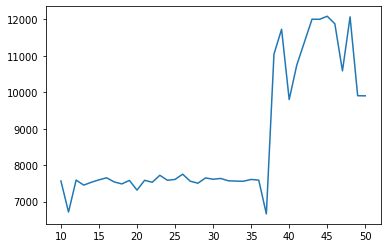

In [6]:
conn = sqlite3.connect('../src/data/Project/working_directory/input/battery_output-000002.db')
battery = pd.read_sql("select * from COUNTERS_ULL_TIME_DATA", conn)
battery = battery[battery["ID_INPUT"] == 6][["MEASUREMENT_TIME", "VALUE"]].rename(columns = {"VALUE": "EXPECTED REMAINING TIME"})
battery["EXPECTED REMAINING TIME"].drop([4,9]).iloc[:40].plot()

This is an example collected from my local computer. The samples before 37 are battery lifetime with ST( Dask with one core ) and The samples after 37 are battery lifetime with background application only. We can calculate ratio of power between P1 and P2 is 2.311